# Preface

# QAOA vs ?

## Dataset - S&P 500 stock data

### Описание

[Данный датасет](https://www.kaggle.com/datasets/camnugent/sandp500/data) представляет собой данные за пять лет по рынку акций списка [S&P 500](https://stockanalysis.com/list/sp-500-stocks/).

### Содержание

Файл данных содержит следующие колонки:

- Date - in format: yy-mm-dd
- Open - price of the stock at market open (this is NYSE data so all in USD Billions)
- High - Highest price reached in the day
- Low Close - Lowest price reached in the day
- Volume - Number of shares traded
- Name - the stock's ticker name

### Предобработка

### Выбор пула стоков

Современные NISQ системы показывают приемлимые результаты для данной модели в пределе пула размером 20, поэтому мы ограничимся таким числом.
В целях исследования, разобъем исследуемые данные на три группы - по максимальному достигнутому значению цены акции (High) для каждой компании (Name). Выберем интервал 'до \\$30B', 'от \\$30B до \\$100B', и 'от \\$100B'. В первых двух интервалах выберем по пять компаний, в последнем десять.

In [273]:
import pandas as pd
pf_df = pd.read_csv('./datasets/all_stocks_5yr.csv')

In [274]:
pf_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  str    
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 33.1 MB


In [275]:
pf_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [276]:
pf_df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [277]:
# Уберем из списка стоки с NA данными
pf_df.drop(pf_df.loc[pf_df['open'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)
pf_df.drop(pf_df.loc[pf_df['high'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)
pf_df.drop(pf_df.loc[pf_df['low'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)

In [278]:
# Преобразование типов
pf_df = pf_df.convert_dtypes()

In [279]:
pf_df.info()

<class 'pandas.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  string 
 1   open    619029 non-null  Float64
 2   high    619029 non-null  Float64
 3   low     619029 non-null  Float64
 4   close   619029 non-null  Float64
 5   volume  619029 non-null  Int64  
 6   Name    619029 non-null  string 
dtypes: Float64(4), Int64(1), string(2)
memory usage: 40.7 MB


In [280]:
pf_df['date'] = pd.to_datetime(pf_df['date'])
pf_df.info()

<class 'pandas.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[us]
 1   open    619029 non-null  Float64       
 2   high    619029 non-null  Float64       
 3   low     619029 non-null  Float64       
 4   close   619029 non-null  Float64       
 5   volume  619029 non-null  Int64         
 6   Name    619029 non-null  string        
dtypes: Float64(4), Int64(1), datetime64[us](1), string(1)
memory usage: 40.7 MB


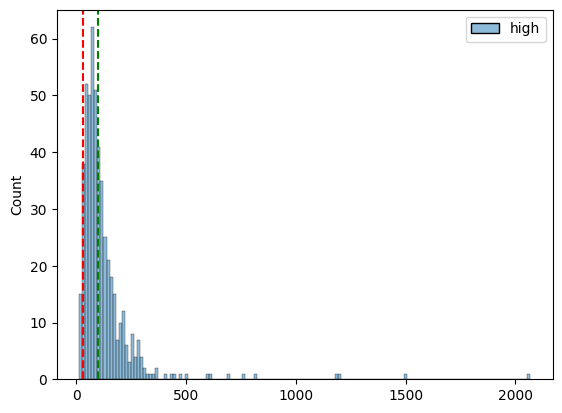

In [281]:
# Группы выбора на графике
import matplotlib.pyplot as plt
import seaborn as sns

high_max = pf_df[['high', 'Name']].groupby(['Name']).max()
sns.histplot(data=high_max, bins=150)
plt.axvline(x=30, color='red', linestyle='--')
plt.axvline(x=100, color='green', linestyle='--')

In [282]:
pf_df1 = high_max[high_max['high'] <= 30].sample(5)
pf_df2 = high_max[high_max['high'].between(30, 100, inclusive='right')].sample(5)
pf_df3 = high_max[high_max['high'] > 100].sample(10)
#pf_df3
#pf_df[pf_df['high']high_max < 30]
#high_max[high_max['high'] < 30].sample(5)
pf_df[pf_df['Name'].isin(pf_df1.index)]['date'].value_counts()

date
2015-10-19    5
2015-10-20    5
2015-10-21    5
2015-10-22    5
2015-10-23    5
             ..
2015-10-12    4
2015-10-13    4
2015-10-14    4
2015-10-15    4
2015-10-16    4
Name: count, Length: 1259, dtype: int64

<Axes: ylabel='Frequency'>

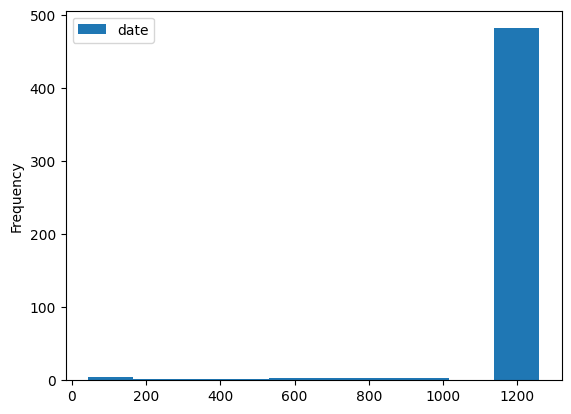

In [283]:
# Давайте узнаем как много организаций не имеют данных на полный период времени
pf_df[['date', 'Name']].groupby(['Name']).count().plot.hist()

In [284]:
# Попробуем использовать для исследования только полные данные.
dates = pf_df['date'].sort_values().unique()
pf_df = pf_df.groupby(['Name']).filter(lambda x: x['date'].count() == len(dates))
high_max = pf_df[['high', 'Name']].groupby(['Name']).max()
pf_df1 = high_max[high_max['high'] <= 30].sample(5, random_state=1)
pf_df2 = high_max[high_max['high'].between(30, 100, inclusive='right')].sample(5, random_state=1)
pf_df3 = high_max[high_max['high'] > 100].sample(10, random_state=1)
pf20_df = pf_df[pf_df['Name'].isin(pf_df1.index)]
pf20_df['class'] = 'C'
pf20_df = pd.concat([pf20_df, pf_df[pf_df['Name'].isin(pf_df2.index)]], ignore_index=True).fillna('B')
pf20_df = pd.concat([pf20_df, pf_df[pf_df['Name'].isin(pf_df3.index)]], ignore_index=True).fillna('A')

Text(0.5, 0.925, 'Closing prices, $B')

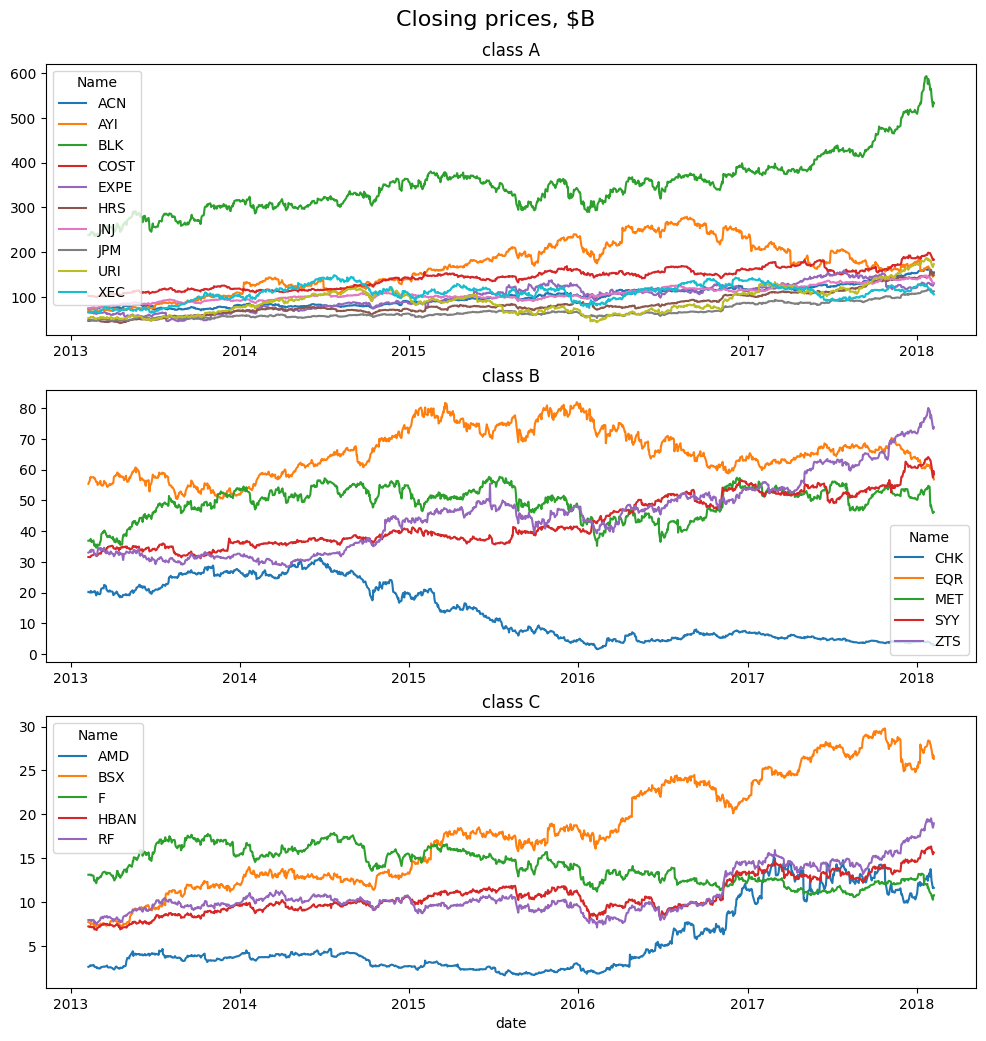

In [285]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
sns.lineplot(data=pf20_df[pf20_df['class'] == 'A'], x='date', y='close', hue='Name', ax=ax[0]).set(xlabel=None, ylabel=None, title='class A')
sns.lineplot(data=pf20_df[pf20_df['class'] == 'B'], x='date', y='close', hue='Name', ax=ax[1]).set(xlabel=None, ylabel=None, title='class B')
sns.lineplot(data=pf20_df[pf20_df['class'] == 'C'], x='date', y='close', hue='Name', ax=ax[2]).set(ylabel=None, title='class C')
fig.suptitle('Closing prices, $B', fontsize=16, y=0.925)
#g = sns.FacetGrid(pf20_df.sort_values('class'), row='class', aspect=4.)
#g.map(sns.lineplot, 'date', 'high', 'Name')
#g.add_legend()

In [286]:
date80 = dates[int(0.8*len(dates))]
pf20train_df = pf20_df[pf20_df['date'] <= date80]
pf20test_df = pf20_df[pf20_df['date'] > date80]
len(pf20train_df) + len(pf20test_df) == len(pf20_df)

True

In [287]:
pf20train_df = pf20train_df[['date', 'close', 'Name']].pivot(index='date', columns='Name', values='close').sort_values('date')
pf20test_df = pf20test_df[['date', 'close', 'Name']].pivot(index='date', columns='Name', values='close').sort_values('date')

In [288]:
pf20train_df
pf20_df['date'].value_counts()

date
2013-02-08    20
2013-02-11    20
2013-02-12    20
2013-02-13    20
2013-02-14    20
              ..
2018-02-01    20
2018-02-02    20
2018-02-05    20
2018-02-06    20
2018-02-07    20
Name: count, Length: 1259, dtype: int64

In [289]:
pd.Timestamp('2018-02-07') - pd.Timestamp('2013-02-08')

Timedelta('1825 days 00:00:00')

In [290]:
pf20_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25180 entries, 0 to 25179
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    25180 non-null  datetime64[us]
 1   open    25180 non-null  Float64       
 2   high    25180 non-null  Float64       
 3   low     25180 non-null  Float64       
 4   close   25180 non-null  Float64       
 5   volume  25180 non-null  Int64         
 6   Name    25180 non-null  string        
 7   class   25180 non-null  str           
dtypes: Float64(4), Int64(1), datetime64[us](1), str(1), string(1)
memory usage: 1.7 MB


In [291]:
# Вычислим дневную доходность
pf20train_df = pf20train_df.diff().div(pf20train_df.index.diff().days.to_series().to_list(), axis='index') / pf20train_df.shift(1)
pf20test_df = pf20test_df.diff().div(pf20test_df.index.diff().days.to_series().to_list(), axis='index') / pf20test_df.shift(1)

In [292]:
pf20train_df = pf20train_df.iloc[1:]
pf20test_df = pf20test_df.iloc[1:]
pf20train_df.info(), pf20test_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 1007 entries, 2013-02-11 to 2017-02-08
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACN     1007 non-null   Float64
 1   AMD     1007 non-null   Float64
 2   AYI     1007 non-null   Float64
 3   BLK     1007 non-null   Float64
 4   BSX     1007 non-null   Float64
 5   CHK     1007 non-null   Float64
 6   COST    1007 non-null   Float64
 7   EQR     1007 non-null   Float64
 8   EXPE    1007 non-null   Float64
 9   F       1007 non-null   Float64
 10  HBAN    1007 non-null   Float64
 11  HRS     1007 non-null   Float64
 12  JNJ     1007 non-null   Float64
 13  JPM     1007 non-null   Float64
 14  MET     1007 non-null   Float64
 15  RF      1007 non-null   Float64
 16  SYY     1007 non-null   Float64
 17  URI     1007 non-null   Float64
 18  XEC     1007 non-null   Float64
 19  ZTS     1007 non-null   Float64
dtypes: Float64(20)
memory usage: 184.9 KB
<class 'pandas.DataFrame'>
Da

(None, None)

<Axes: xlabel='Name', ylabel='annual daily returns'>

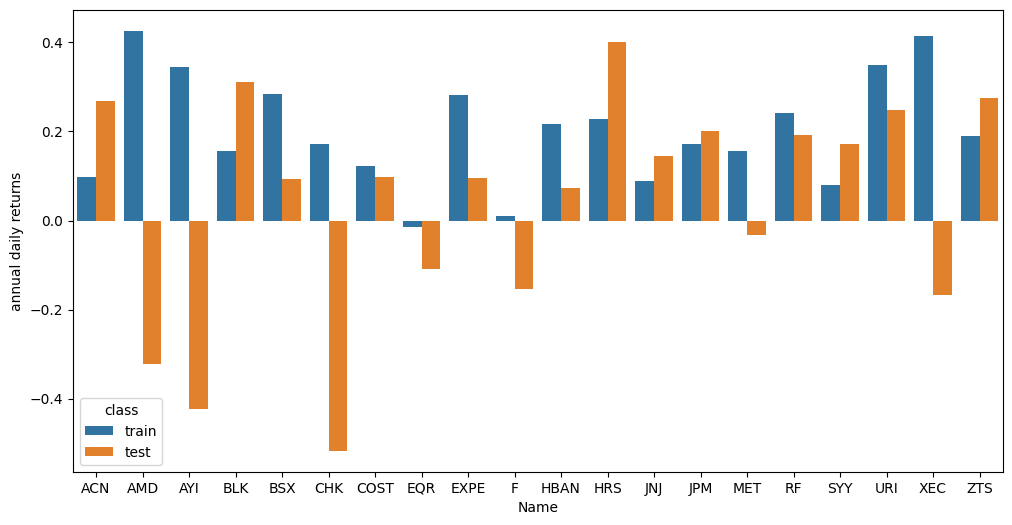

In [293]:
# Получаем годовые значения
pf20train_covann = pf20train_df.cov()*252
pf20test_covann = pf20test_df.cov()*252
pf20train_covann.max(axis=None)
pf20train_drann = pf20train_df.mean()*252
pf20test_drann = pf20test_df.mean()*252
pf20_drann = pf20train_drann.to_frame()
pf20_drann['class'] = 'train'
pf20_drann = pd.concat([pf20_drann, pf20test_drann]).fillna('test')
pf20_drann.columns = ['annual daily returns', 'class']
plt.figure(figsize=(12, 6))
sns.barplot(pf20_drann, x='Name', y='annual daily returns', hue='class')

Text(0.5, 0.95, 'Annualized covariance matrix for daily returns')

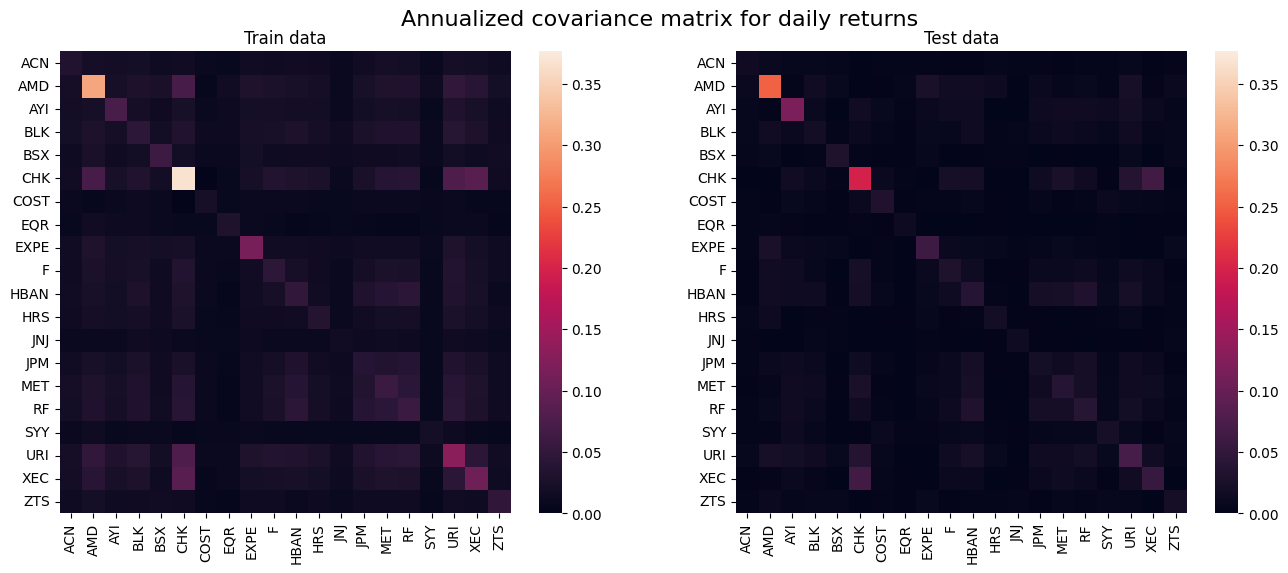

In [294]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
vmin = 0.0
vmax = 1.025 * max(pf20train_covann.max(axis=None), pf20test_covann.max(axis=None))
sns.heatmap(pf20train_covann, vmin=vmin, vmax=vmax, ax=ax[0]).set(xlabel=None, ylabel=None, title='Train data')
sns.heatmap(pf20test_covann, vmin=vmin, vmax=vmax, ax=ax[1]).set(xlabel=None, ylabel=None, title='Test data')
fig.suptitle('Annualized covariance matrix for daily returns', fontsize=16, y=0.95)

# QSVM vs SVM

## Dataset - "SME - Synthetic UK Businesses financial statistics"

### Описание

Информация о многих данных используемых в финансовом секторе недоступна рядовому пользователю. Финансовые организации, в погоне за прибылью, используют всю возможную информацию о своих клиентах, и редко ей делятся. Поэтому для исследований в таких областях как fraud detection или credit scoring часто используются синтетические данные, как в данном случае.

[Данный датасет](https://www.kaggle.com/datasets/nayaone/sme-uk-businesses-financial-statistics) содержит финансовую и базовую информацию о 1000 малых и средних предприятий Великобритании. В сумме он содержит более 200 аттрибутов, которые могут быть использованы для оценки выживаемости и успешности предприятий.

### Содержание

Датасеты, присутстующие в данном наборе:

    Account Receivable: Funds that customers owe your company for products or services that have been invoiced.
    Businesses: List of enterprises and their information
    Covid: Financial stats of the companies during the pandemic waves
    Credit Account History: History of a credit account and usage of
    Credit Card History: History of the credit card usage and debt amount of an enterprise
    Credit Rating: credit rating of listed businesses which is a quantified assessment of the creditworthiness of a borrower in general terms or with respect to a financial obligation.
    Director: UK Individual who is on the Director position in companies listed in Businesses
    Factoring: Financial transaction and a type of debtor finance in which a business sells its accounts receivable to a third party at a discount.
    Individual: UK Individuals information
    Loan: Information of the paid and unpaid Loans by the enterprise


In [295]:
import os
cds_dc = {f:pd.read_csv(os.path.join('./datasets/credit_scoring', f)) for f in os.listdir('./datasets/credit_scoring')}
cds_dc.keys()
#cds_ls[0].info()

dict_keys(['Businesses.csv', 'Loan.csv', 'Account_Receivable.csv', 'Individual.csv', 'Credit_Rating.csv', 'Factoring.csv', 'Director.csv', 'COVID.csv', 'Credit_Card_History.csv', 'Credit_Account_History.csv'])

In [296]:
[(k, len(cds_dc[k])) for k in cds_dc.keys()]

[('Businesses.csv', 1000),
 ('Loan.csv', 90),
 ('Account_Receivable.csv', 79648),
 ('Individual.csv', 10000),
 ('Credit_Rating.csv', 900),
 ('Factoring.csv', 974),
 ('Director.csv', 2878),
 ('COVID.csv', 884),
 ('Credit_Card_History.csv', 353),
 ('Credit_Account_History.csv', 1509)]

In [297]:
# Убираем данные по ковиду и по частникам
cds_dc.pop('COVID.csv')
cds_dc.pop('Individual.csv')

,Unnamed: 0,name,sex,date_of_birth,email_address,Unnamed: 5,geography,postcode,ethnic_group,nationality,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,Jean Singh,female,03-01-1959,jean_singh59@a116b.dawson.net,NaN,Wales,SA10 6LH,White,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Carol Burrows,female,10-08-1931,carol-burrows1931@03b4c.cox.biz,NaN,South East,OX3 9PX,Asian / Asian British: Pakistani,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Jay Richardson,male,29-10-1966,j.richardson66@862ba.outlook.com,NaN,London,SW20 0NP,White,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Amelia Reeves,female,12-07-2006,amelia-reeves@b3e37.hotmail.com,NaN,Yorkshire and The Humber,YO41 1ET,White,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Max Booth,male,17-05-2007,boothmax@5eec4.wright-north.com,NaN,North West,CH45 7LY,Mixed / Multiple ethnic group,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Sarah Reid,female,28-03-1996,rsarah7963@83291.smith-wells.com,NaN,London,SE5 0NU,Other Ethnic Group,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9996,Julian Martin,male,27-04-1987,j.martin3000@a4f41.outlook.com,NaN,East Midlands,DE24 3BJ,White,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9997,Stephanie Hill,female,26-04-2019,stephanie-hill9966@0738f.baker.com,NaN,East,NR33 9PL,White,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9998,Patrick Hurst,male,10-07-1982,p_hurst@97455.outlook.com,NaN,West Midlands,B2 5UF,White,China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
cds_dc.keys()

dict_keys(['Businesses.csv', 'Loan.csv', 'Account_Receivable.csv', 'Credit_Rating.csv', 'Factoring.csv', 'Director.csv', 'Credit_Card_History.csv', 'Credit_Account_History.csv'])

In [299]:
cds_dc['Account_Receivable.csv'].info()
cds_dc['Credit_Rating.csv'].info()
cds_dc['Credit_Rating.csv'].head()

<class 'pandas.DataFrame'>
RangeIndex: 79648 entries, 0 to 79647
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79648 non-null  int64  
 1   invoice_id           79648 non-null  int64  
 2   company_reg_number   79648 non-null  int64  
 3   invoice_date         79648 non-null  str    
 4   invoice_amount       79648 non-null  float64
 5   end_date             79648 non-null  str    
 6   disputed             79648 non-null  int64  
 7   paper_or_electronic  79648 non-null  str    
dtypes: float64(1), int64(4), str(3)
memory usage: 4.9 MB
<class 'pandas.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      900 non-null    int64  
 1   company_reg_num

,Unnamed: 0,company_reg_number,credit_report_agency,credit_report_date,credit_report_model,credit_report_requests_to_view_last_five_years,credit_report_total_indebtedness,liens_filed_and_open,liens_closed_last_five_years,missed_and_late_payments_last_five_years,filed_court_cases_last_five_years,payment_index,credit_report_negative_items,credit_report_good_standing_items,business_failure_score,credit_report_credit_score,ratio_debt_to_revenue
0,0,20000000,Experian,2021-11-23,FICO 8,6,7548.00,0,1,0,0,2,1,4,63,765,0.013964
1,1,20000001,Equifax,2021-01-29,FICO 8,5,28100.00,0,0,0,0,21,1,1,59,676,0.121491
2,2,20000002,Equifax,2021-04-13,FICO 8,6,15631.00,0,1,0,0,16,1,4,53,663,0.076898
3,3,20000003,Equifax,2021-09-25,FICO 4,3,0.00,0,0,0,0,2,0,3,93,0,0.000000
4,4,20000004,Equifax,2021-08-13,FICO 9,0,75605.28,0,0,0,0,17,0,4,81,773,0.193195


In [300]:
cds_dc['Factoring.csv'].head()
cds_dc['Factoring.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          974 non-null    int64
 1   company_reg_number  974 non-null    int64
 2   revenue_2019        974 non-null    int64
 3   factor_amount       974 non-null    int64
 4   factor_percent      974 non-null    int64
 5   factoring_type      105 non-null    str  
 6   factoring_provider  105 non-null    str  
dtypes: int64(5), str(2)
memory usage: 53.4 KB


In [301]:
cds_dc['Director.csv'].head()
cds_dc['Director.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2878 non-null   int64  
 1   company_reg_number           2878 non-null   int64  
 2   indv_id                      2878 non-null   int64  
 3   officer                      2878 non-null   int64  
 4   ubo                          2878 non-null   int64  
 5   current_employee_at_company  2878 non-null   int64  
 6   employment_status            2878 non-null   int64  
 7   appointment                  2878 non-null   str    
 8   termination                  2878 non-null   str    
 9   disqual                      2878 non-null   int64  
 10  start_date_of_disqual        0 non-null      float64
 11  end_date_of_disqual          0 non-null      float64
 12  dob                          2878 non-null   str    
 13  active_company               

In [302]:
cds_dc.pop('Director.csv')
cds_dc['Businesses.csv'].head()
cds_dc['Businesses.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   int64  
 1   borough_county                1000 non-null   str    
 2   address                       1000 non-null   str    
 3   contact_phone_no              1000 non-null   str    
 4   primary_sector                1000 non-null   str    
 5   entity_trade_name             1000 non-null   str    
 6   company_type                  1000 non-null   str    
 7   entity_name                   1000 non-null   str    
 8   company_reg_number            1000 non-null   int64  
 9   annual_turnover               1000 non-null   str    
 10  number_of_employees           1000 non-null   str    
 11  number_of_officers            1000 non-null   int64  
 12  incorporation_date            1000 non-null   str    
 13  entity_status  

In [303]:
cds_dc['Credit_Card_History.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              353 non-null    int64  
 1   cc_number               353 non-null    int64  
 2   company_reg_number      353 non-null    int64  
 3   cc_start_date           353 non-null    str    
 4   cc_billing_enddate      353 non-null    str    
 5   cc_agreed_limit         353 non-null    float64
 6   cc_balance_limit_ratio  353 non-null    float64
 7   cc_missed_payments      78 non-null     float64
 8   missed_payments_number  353 non-null    int64  
dtypes: float64(3), int64(4), str(2)
memory usage: 24.9 KB


In [304]:
cds_dc.keys()

dict_keys(['Businesses.csv', 'Loan.csv', 'Account_Receivable.csv', 'Credit_Rating.csv', 'Factoring.csv', 'Credit_Card_History.csv', 'Credit_Account_History.csv'])

In [305]:
cds_dc['Account_Receivable.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 79648 entries, 0 to 79647
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79648 non-null  int64  
 1   invoice_id           79648 non-null  int64  
 2   company_reg_number   79648 non-null  int64  
 3   invoice_date         79648 non-null  str    
 4   invoice_amount       79648 non-null  float64
 5   end_date             79648 non-null  str    
 6   disputed             79648 non-null  int64  
 7   paper_or_electronic  79648 non-null  str    
dtypes: float64(1), int64(4), str(3)
memory usage: 4.9 MB


In [306]:
cds_dc['Account_Receivable.csv']['company_reg_number'].value_counts()

company_reg_number
20000550    349
20000962    348
20000870    345
20000382    344
20000505    344
           ... 
20000177     11
20000355     11
20000804     11
20000969     11
20000814     10
Name: count, Length: 957, dtype: int64

In [307]:
len(set(cds_dc['Businesses.csv']['company_reg_number']) & set(cds_dc['Loan.csv']['company_reg_number']))

87

In [308]:
cds_dc['Loan.csv'].info()

<class 'pandas.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         90 non-null     int64  
 1   loan                                               90 non-null     int64  
 2   overdraft                                          90 non-null     int64  
 3   primary_sector                                     90 non-null     str    
 4   company_reg_number                                 90 non-null     int64  
 5   loan_id                                            90 non-null     str    
 6   loan_start_date                                    90 non-null     str    
 7   loan_original_amount                               90 non-null     int64  
 8   loan_status                                        90 non-null     str    
 9   loan_repayment_frequenc

In [309]:
cds_dc['Loan.csv']['company_reg_number'].value_counts()

company_reg_number
20000034    2
20000150    2
20000984    2
20000000    1
20000017    1
           ..
20000929    1
20000936    1
20000947    1
20000953    1
20000970    1
Name: count, Length: 87, dtype: int64

In [310]:
cds_merged = cds_dc['Businesses.csv'].merge(cds_dc['Loan.csv'], on='company_reg_number', how='left', suffixes=('', '_LOAN')).\
merge(cds_dc['Account_Receivable.csv'], on='company_reg_number', how='left', suffixes=('', '_ACC_RECV')).\
merge(cds_dc['Credit_Rating.csv'], on='company_reg_number', how='left', suffixes=('', '_CR')).\
merge(cds_dc['Factoring.csv'], on='company_reg_number', how='left', suffixes=('', '_FACTORING')).\
merge(cds_dc['Credit_Card_History.csv'], on='company_reg_number', how='left', suffixes=('', '_CREDIT_CARD')).\
merge(cds_dc['Credit_Account_History.csv'], on='company_reg_number', how='left', suffixes=('', '_CREDIT_ACC'))

In [311]:
cds_merged.info(max_cols=500)

<class 'pandas.DataFrame'>
RangeIndex: 234393 entries, 0 to 234392
Data columns (total 149 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    Unnamed: 0                                         234393 non-null  int64  
 1    borough_county                                     234393 non-null  str    
 2    address                                            234393 non-null  str    
 3    contact_phone_no                                   234393 non-null  str    
 4    primary_sector                                     234393 non-null  str    
 5    entity_trade_name                                  234393 non-null  str    
 6    company_type                                       234393 non-null  str    
 7    entity_name                                        234393 non-null  str    
 8    company_reg_number                                 234393 non-null  int64

In [312]:
cds_merged.dropna(axis=1, how='all', inplace=True)
cds_merged.info(max_cols=500)

<class 'pandas.DataFrame'>
RangeIndex: 234393 entries, 0 to 234392
Data columns (total 136 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    Unnamed: 0                                         234393 non-null  int64  
 1    borough_county                                     234393 non-null  str    
 2    address                                            234393 non-null  str    
 3    contact_phone_no                                   234393 non-null  str    
 4    primary_sector                                     234393 non-null  str    
 5    entity_trade_name                                  234393 non-null  str    
 6    company_type                                       234393 non-null  str    
 7    entity_name                                        234393 non-null  str    
 8    company_reg_number                                 234393 non-null  int64

In [313]:
cds_merged.drop(columns=['Unnamed: 0', 'Unnamed: 0_LOAN',  'Unnamed: 0_ACC_RECV', 'Unnamed: 0_CR',
                         'Unnamed: 0_FACTORING', 'Unnamed: 0_CREDIT_CARD', 'Unnamed: 0_CREDIT_ACC'], inplace=True)
cds_merged.info(max_cols=500)

<class 'pandas.DataFrame'>
RangeIndex: 234393 entries, 0 to 234392
Data columns (total 129 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    borough_county                                     234393 non-null  str    
 1    address                                            234393 non-null  str    
 2    contact_phone_no                                   234393 non-null  str    
 3    primary_sector                                     234393 non-null  str    
 4    entity_trade_name                                  234393 non-null  str    
 5    company_type                                       234393 non-null  str    
 6    entity_name                                        234393 non-null  str    
 7    company_reg_number                                 234393 non-null  int64  
 8    annual_turnover                                    234393 non-null  str  

In [314]:
set(cds_dc['Businesses.csv'].columns) - set(cds_dc['Credit_Account_History.csv'].columns) 


{'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45'}

In [315]:
cds_dc['Credit_Account_History.csv'].info()
cds_dc['Credit_Account_History.csv']['company_reg_number'].value_counts()

<class 'pandas.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1509 non-null   int64  
 1   borough_county                1509 non-null   str    
 2   address                       1509 non-null   str    
 3   contact_phone_no              1509 non-null   str    
 4   primary_sector                1509 non-null   str    
 5   entity_trade_name             1509 non-null   str    
 6   company_type                  1509 non-null   str    
 7   entity_name                   1509 non-null   str    
 8   company_reg_number            1509 non-null   int64  
 9   annual_turnover               1509 non-null   str    
 10  number_of_employees           1509 non-null   str    
 11  number_of_officers            1509 non-null   int64  
 12  incorporation_date            1509 non-null   str    
 13  entity_status 

company_reg_number
20000015    4
20000049    4
20000067    4
20000097    4
20000100    4
           ..
20000993    1
20000995    1
20000996    1
20000997    1
20000999    1
Name: count, Length: 1000, dtype: int64

In [316]:
cds_dc.pop('Businesses.csv')

,Unnamed: 0,borough_county,address,contact_phone_no,primary_sector,entity_trade_name,company_type,entity_name,company_reg_number,annual_turnover,...,revenue_2019,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,0,Haringey,633 Shaw trail Juliaview N22 8QN,4.41675E+11,47 : Retail,"Jennings-Lawson, Williams-Davis, Slater, Colli...",1.1 - Public Company (incl. Building Society),"Jennings-Lawson, Williams-Davis, Slater, Colli...",20000000,0-632k,...,540536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Lambeth,Flat 30 Khan camp SE5 9QU,4.44125E+11,41-43 : Construction,"King-Akhtar, O'Brien, Poole, Marshall, Brown, ...",1.1 - Public Company (incl. Building Society),"King-Akhtar, O'Brien, Poole, Marshall and Sons Co",20000001,0-632k,...,231292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Cheshire East,Flat 1 Grace path WA14 3RB,5489655081,05-39 : Production,"Wood, Jones, Brooks, Bates, Walker-Slater",1.1 - Public Company (incl. Building Society),"Wood, Jones, Brooks, Bates, Scott, Farmer-Godd...",20000002,0-632k,...,203270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Dudley,Flat 36r Antony creek DY9 7LT,+44100 3550636,49-53 : Transport & Storage (inc. postal),"Bell, O'Brien, Rose, James, Brown, Mills, Prit...",1.1 - Public Company (incl. Building Society),"Bell, O'Brien, Rose, James, Pearce, Kaur, Mist...",20000003,0-632k,...,118794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Cheltenham,Studio 72 Reed street GL52 6JR,+441699 03 48 77,41-43 : Construction,"Stewart, Brown, Sanderson, Allen, Walker-Price",1.1 - Public Company (incl. Building Society),"Stewart, Brown, Sanderson, Allen, Richardson, ...",20000004,0-632k,...,391341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Lancaster,Flat 79Q Banks forge LA4 5NS,(0987)2714979,77-82 : Business administration & support serv...,"Edwards, Barnett, Payne, Read, Faulkner",1.1 - Public Company (incl. Building Society),"Edwards, Barnett, Payne, Read, Summers, Evans Co",20000995,632k-10.2M,...,288940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,"Bournemouth, Christchurch and Poole",Studio 7 Schofield ports BH1 4GZ,4.4525E+11,"69-75 : Professional, scientific & technical","Evans-Dean, Phillips, Smith-Hall, Jenkins-Davi...",1.1 - Public Company (incl. Building Society),"Evans-Dean, Phillips, Smith-Hall, Jenkins-Davi...",20000996,0-632k,...,210947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,Salford,76 Curtis ferry Emmaville M28 0EL,+44922 3737680,86-88 : Health,"Price-George, Cox, Forster, Hunter, Fisher, Ha...",1.2.1 - Private Limited Company (incl. Buildin...,"Price-George, Cox, Forster, Hunter, Moore-Farm...",20000997,0-632k,...,149555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,Antrim and Newtownabbey,665 Walker port Cooperview BT39 0NW,(0735) 3140544,41-43 : Construction,"Bailey, Cooper, Carter, Thomas, Pearson, Hill,...",1.1 - Public Company (incl. Building Society),"Bailey, Cooper, Carter, Thomas, Wright, Owen, ...",20000998,0-632k,...,406235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
cds_merged = cds_dc['Credit_Account_History.csv'].merge(cds_dc['Loan.csv'], on='company_reg_number', how='left', suffixes=('', '_LOAN')).\
merge(cds_dc['Account_Receivable.csv'], on='company_reg_number', how='left', suffixes=('', '_ACC_RECV')).\
merge(cds_dc['Credit_Rating.csv'], on='company_reg_number', how='left', suffixes=('', '_CR')).\
merge(cds_dc['Factoring.csv'], on='company_reg_number', how='left', suffixes=('', '_FACTORING')).\
merge(cds_dc['Credit_Card_History.csv'], on='company_reg_number', how='left', suffixes=('', '_CREDIT_CARD'))
cds_merged.dropna(axis=1, how='all', inplace=True)
cds_merged.drop(columns=['Unnamed: 0', 'Unnamed: 0_LOAN',  'Unnamed: 0_ACC_RECV', 'Unnamed: 0_CR',
                         'Unnamed: 0_FACTORING', 'Unnamed: 0_CREDIT_CARD'], inplace=True)

In [318]:
cds_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 234393 entries, 0 to 234392
Data columns (total 96 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   borough_county                                     234393 non-null  str    
 1   address                                            234393 non-null  str    
 2   contact_phone_no                                   234393 non-null  str    
 3   primary_sector                                     234393 non-null  str    
 4   entity_trade_name                                  234393 non-null  str    
 5   company_type                                       234393 non-null  str    
 6   entity_name                                        234393 non-null  str    
 7   company_reg_number                                 234393 non-null  int64  
 8   annual_turnover                                    234393 non-null  str    
 9   numb

# VQC

# [Grover's Algorithm]

# Conclusion